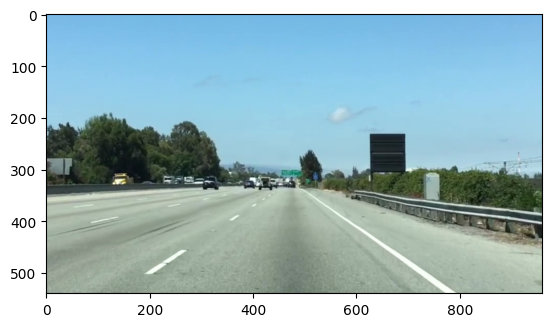

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = mpimg.imread('image_lane_c.jpg')
plt.imshow(img)  # prints the image

In [2]:
img.shape   # Gets the image size where 3 = RGB frames  

(540, 960, 3)

True

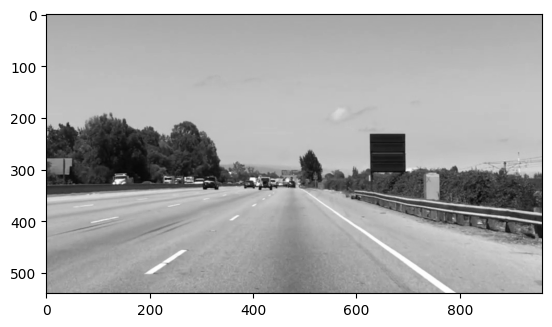

In [3]:
img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)    #converts the image to greyscale
plt.imshow(img_g, cmap='gray')
cv2.imwrite('image_lane_c_g.jpg', img_g)     #saves the image 

In [4]:
print('RGB units')
print(img)
print('Grey scale units')
print(img_g)

RGB units
[[[122 185 229]
  [122 185 229]
  [123 186 230]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 [[122 185 229]
  [122 185 229]
  [122 185 229]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 [[122 185 229]
  [122 185 229]
  [122 185 229]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 ...

 [[154 166 154]
  [156 168 156]
  [153 165 153]
  ...
  [180 197 181]
  [181 198 182]
  [181 198 182]]

 [[162 174 164]
  [160 172 162]
  [152 164 154]
  ...
  [174 192 176]
  [175 193 177]
  [176 194 178]]

 [[156 168 158]
  [148 160 150]
  [137 149 139]
  ...
  [161 179 163]
  [162 180 164]
  [162 180 164]]]
Grey scale units
[[171 171 172 ... 171 171 171]
 [171 171 171 ... 171 171 171]
 [171 171 171 ... 171 171 171]
 ...
 [161 163 160 ... 190 191 191]
 [169 167 159 ... 185 186 187]
 [163 155 144 ... 172 173 173]]


In [5]:
img_copy = np.copy(img_g)
img_copy.shape #converts the size to 2d matrix

(540, 960)

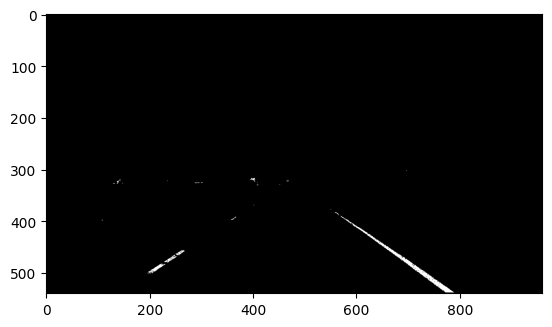

In [6]:
img_copy[(img_copy[:,:])<250] = 0  # converts all value below 250 to 0 and | helps in lane detection in grey scale image 
plt.imshow(img_copy, cmap='gray')

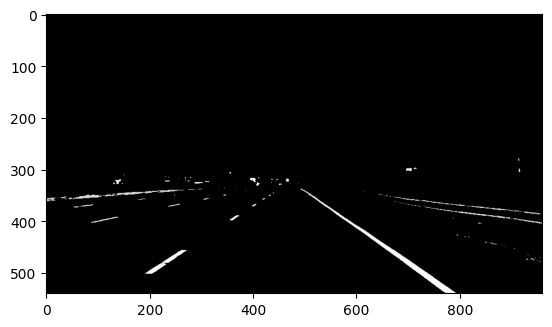

In [7]:
img_copy_2 = np.copy(img)
img_copy_2.shape #converts the size to 2d matrix
img_copy_2[ (img_copy_2[:,:,0] < 200) | (img_copy_2[:,:,1] < 200) | (img_copy_2[:,:,2] < 200) ] = 0  # converts all value below 250 to 0 detects late for colour image  
plt.imshow(img_copy_2, cmap='gray')
plt.show()

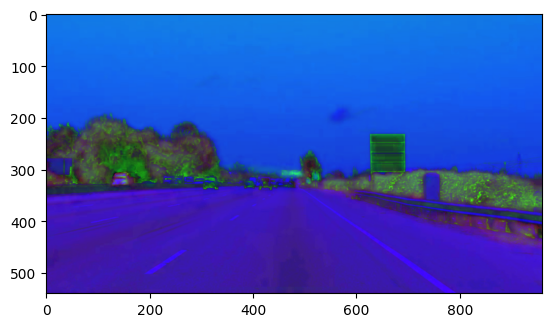

In [8]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    #converts the image to HSV format
plt.imshow(img_hsv)  

In [9]:
img_hsv.shape #this again has 3 channels Hue Saturation and value 

(540, 960, 3)

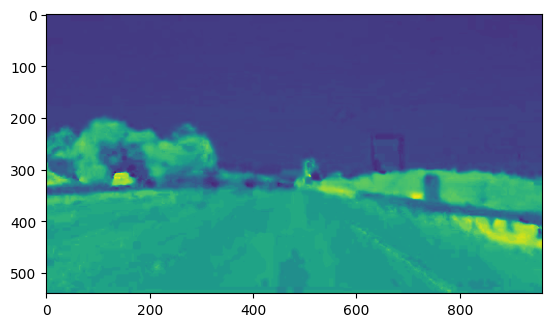

In [10]:
plt.imshow(img_hsv[:,:,0]) #hue

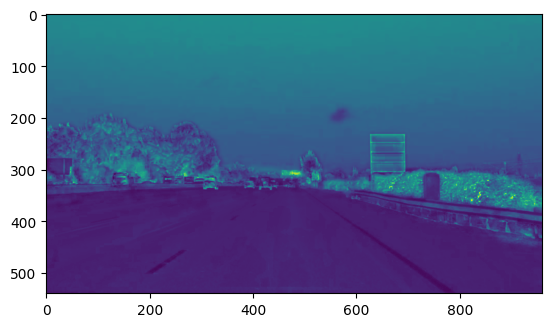

In [11]:
plt.imshow(img_hsv[:,:,1]) #saturation 

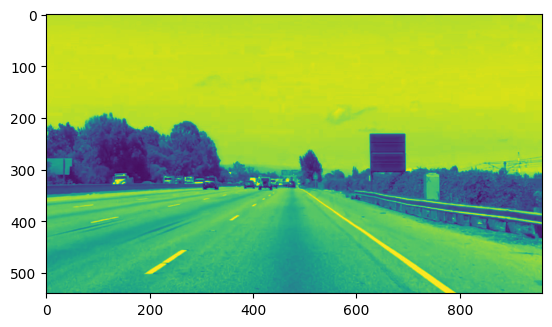

In [12]:
plt.imshow(img_hsv[:,:,2]) #value

In [13]:
B, G, R = cv2.split(img) #split image

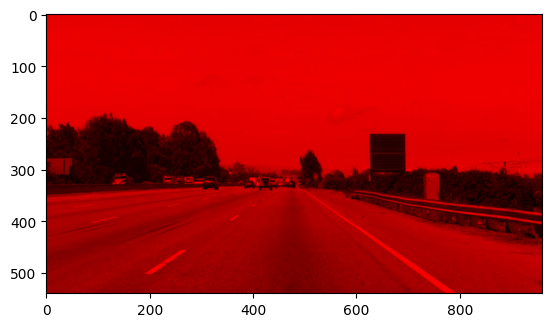

In [14]:
zeros = np.zeros(B.shape, dtype='uint8')   # creating a zero matrix of same dimention as the RGB chanels 
plt.imshow(cv2.merge([R, zeros, zeros]))  #get the image in R

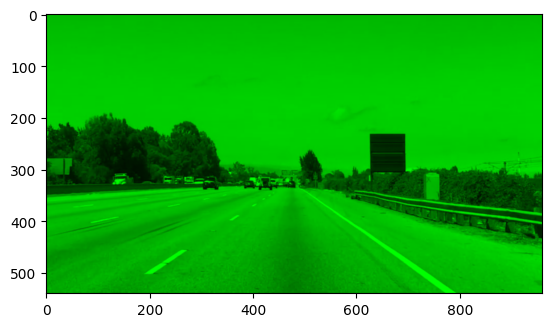

In [15]:
plt.imshow(cv2.merge([zeros, G, zeros])) #get the image in G

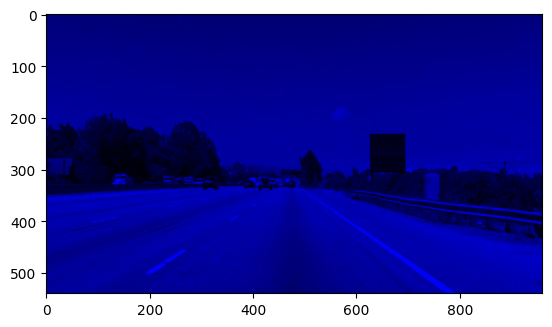

In [16]:
plt.imshow(cv2.merge([zeros, zeros, B]))  #get the image in B

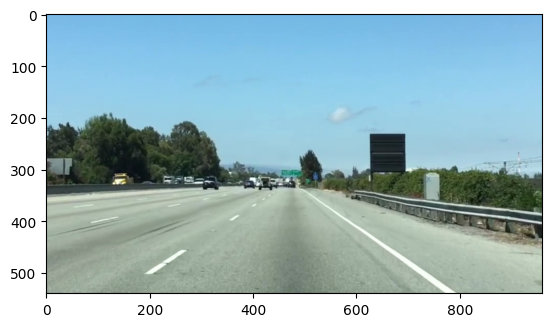

In [17]:
plt.imshow(cv2.merge([B, G, R]))  #get the image back

In [31]:
# sharpeninng of Image 
sharp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharp_kernel_2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img_shrp = cv2.filter2D(img, -1, sharp_kernel)
cv2.imshow('Sharpened Image', img_shrp)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
# Blurring of Image 
blur_kernel = np.ones((3,3)) * 1/9
img_blur = cv2.filter2D(img, -1, blur_kernel)
cv2.imshow('Blured Image', img_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
image = cv2.imread('Self_Driving_Car.jpg')
cv2.imshow('Self Driving Car!', image)
# 'waitKey' allows us to input information when a image window is open
# By leaving it blank it just waits for anykey to be pressed before continuing. 
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
# edge detection using sobel 
# Sobel Calculations 
x_sobel = cv2.Sobel(img_g, cv2.CV_64F, 0, 1, ksize = 7)
cv2.imshow('Sobel - X direction', x_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [35]:
# Sobel Calculations
y_sobel = cv2.Sobel(img_g, cv2.CV_64F, 1, 0, ksize = 7)
cv2.imshow('Sobel - y direction', y_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
# edge detection using laplacian
laplacian = cv2.Laplacian(img_g, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# edge detection using Canny Edge
threshold_1 = 150   # threshold1 – first threshold for the hysteresis procedure.
threshold_2 = 200   # threshold2 – second threshold for the hysteresis procedure.
canny = cv2.Canny(img_g, threshold_1, threshold_2)
cv2.imshow('Canny', canny)
cv2.waitKey()
cv2.destroyAllWindows()